<a href="https://colab.research.google.com/github/jyanivaddi/ERA_V1/blob/master/session_6/S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add these lines to clone the repository to our notebook

In [10]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull


fatal: destination path 'ERA_V1' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git


['.config', 'ERA_V1', 'sample_data']

Import all the required libraries. We need to add the "session_6" location to our path so that the scripts are visible to the notebook. 

In [24]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_6")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from s6_model import Net, model_summary, model_train, model_test
from s6_utils import load_mnist_data, preview_batch_images, plot_statistics

In [13]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Net().to(device)
model_summary(mnist_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,304
       BatchNorm2d-4           [-1, 16, 24, 24]              32
            Conv2d-5           [-1, 16, 22, 22]           2,304
       BatchNorm2d-6           [-1, 16, 22, 22]              32
            Conv2d-7           [-1, 16, 20, 20]           2,304
       BatchNorm2d-8           [-1, 16, 20, 20]              32
            Conv2d-9             [-1, 16, 8, 8]           2,304
      BatchNorm2d-10             [-1, 16, 8, 8]              32
           Conv2d-11             [-1, 16, 6, 6]           2,304
      BatchNorm2d-12             [-1, 16, 6, 6]              32
           Conv2d-13             [-1, 16, 4, 4]           2,304
      BatchNorm2d-14             [-1, 1

In [14]:
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22),],p=0.1),
    transforms.Resize((28,28)),
    transforms.RandomRotation([-15.,15],fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),
    ])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(.3081,)),
])

In [15]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 221332236.20it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 26073115.33it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 58636579.73it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21947613.79it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [16]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, **kwargs)


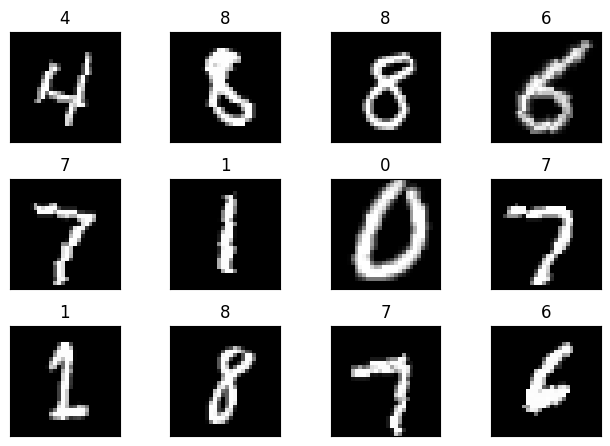

In [17]:
preview_batch_images(train_loader)

In [18]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.09165477007627487 batch_id=468 Accuracy = 93.40: 100%|██████████| 469/469 [00:23<00:00, 19.59it/s]



Test set: Average loss: 0.0725, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.08670537918806076 batch_id=468 Accuracy = 97.85: 100%|██████████| 469/469 [00:24<00:00, 18.80it/s]



Test set: Average loss: 0.0449, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.11268412321805954 batch_id=468 Accuracy = 98.29: 100%|██████████| 469/469 [00:24<00:00, 18.81it/s]



Test set: Average loss: 0.0434, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.06448974460363388 batch_id=468 Accuracy = 98.47: 100%|██████████| 469/469 [00:25<00:00, 18.16it/s]



Test set: Average loss: 0.0294, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.06600303202867508 batch_id=468 Accuracy = 98.61: 100%|██████████| 469/469 [00:24<00:00, 18.85it/s]



Test set: Average loss: 0.0309, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.03262164071202278 batch_id=468 Accuracy = 98.70: 100%|██████████| 469/469 [00:25<00:00, 18.75it/s]



Test set: Average loss: 0.0245, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.008406131528317928 batch_id=468 Accuracy = 98.75: 100%|██████████| 469/469 [00:24<00:00, 18.89it/s]



Test set: Average loss: 0.0230, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.02729680947959423 batch_id=468 Accuracy = 98.80: 100%|██████████| 469/469 [00:24<00:00, 18.80it/s]



Test set: Average loss: 0.0243, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.021529240533709526 batch_id=468 Accuracy = 98.89: 100%|██████████| 469/469 [00:24<00:00, 19.22it/s]



Test set: Average loss: 0.0215, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.02585011161863804 batch_id=468 Accuracy = 98.86: 100%|██████████| 469/469 [00:24<00:00, 18.95it/s]



Test set: Average loss: 0.0233, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.02033230848610401 batch_id=468 Accuracy = 98.89: 100%|██████████| 469/469 [00:25<00:00, 18.74it/s]



Test set: Average loss: 0.0234, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.007565041538327932 batch_id=468 Accuracy = 98.94: 100%|██████████| 469/469 [00:24<00:00, 18.92it/s]



Test set: Average loss: 0.0216, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.03561588004231453 batch_id=468 Accuracy = 98.94: 100%|██████████| 469/469 [00:25<00:00, 18.71it/s]



Test set: Average loss: 0.0184, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.03434567525982857 batch_id=468 Accuracy = 99.01: 100%|██████████| 469/469 [00:24<00:00, 18.82it/s]



Test set: Average loss: 0.0196, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-02.


loss=0.07865845412015915 batch_id=468 Accuracy = 99.02: 100%|██████████| 469/469 [00:25<00:00, 18.62it/s]



Test set: Average loss: 0.0158, Accuracy: 9957/10000 (99.57%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.024260520935058594 batch_id=468 Accuracy = 99.17: 100%|██████████| 469/469 [00:24<00:00, 18.76it/s]



Test set: Average loss: 0.0126, Accuracy: 9961/10000 (99.61%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.014990873634815216 batch_id=468 Accuracy = 99.31: 100%|██████████| 469/469 [00:24<00:00, 18.80it/s]



Test set: Average loss: 0.0134, Accuracy: 9959/10000 (99.59%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.010986936278641224 batch_id=468 Accuracy = 99.32: 100%|██████████| 469/469 [00:27<00:00, 17.03it/s]



Test set: Average loss: 0.0134, Accuracy: 9958/10000 (99.58%)

Adjusting learning rate of group 0 to 1.0000e-03.


loss=0.02775993011891842 batch_id=468 Accuracy = 99.33: 100%|██████████| 469/469 [00:24<00:00, 18.77it/s]



Test set: Average loss: 0.0131, Accuracy: 9959/10000 (99.59%)

Adjusting learning rate of group 0 to 1.0000e-03.


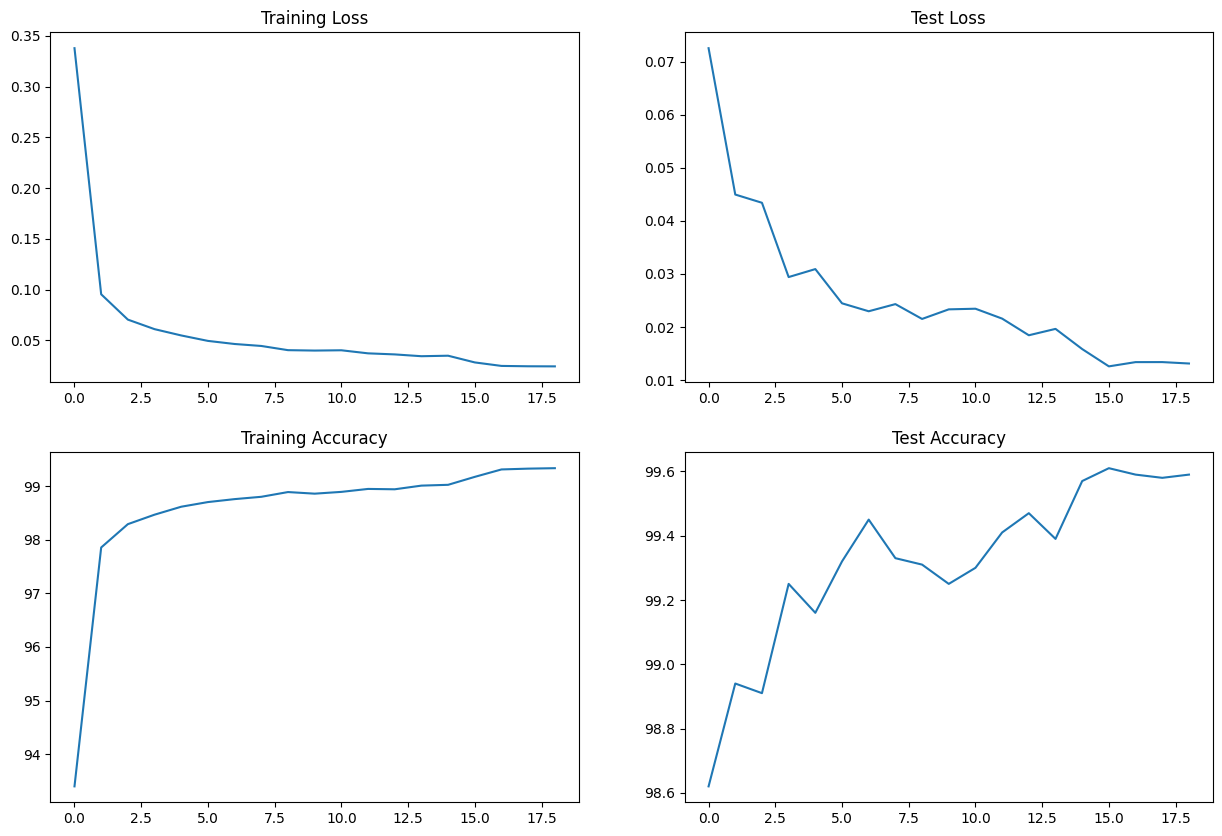

In [26]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)
